In [1]:
import numpy as np
import findspark
findspark.init()
findspark.find()
import pyspark
import pyspark
import matplotlib.pyplot as plt
import pandas as pd
from pyspark.sql import SparkSession

In [2]:
conf = pyspark.SparkConf() 
sc = pyspark.SparkContext('spark://192.168.2.84:7077','test functions')
spark = SparkSession.builder.getOrCreate()

In [3]:
def parseLine(line):
    fields = line.split(',')
    key = str(fields[0][1:])
    count = int(fields[1][:-1])
    return (key,count)

In [4]:
textRDD = sc.textFile("/kmer_counting/output_java_spark_4mer/part-00000")
ordersTuple=textRDD.map(parseLine)
print(ordersTuple.count())

224553


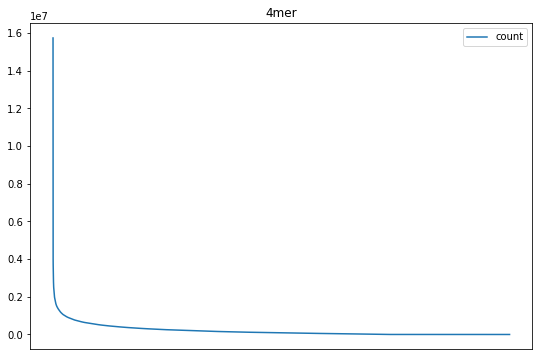

In [5]:
columns = ['key','count']
ax = ordersTuple.toDF(columns).toPandas().plot.line(x='key', y='count', rot=0, figsize=(9,6))
ax.set_title("4mer")
ax.get_xaxis().set_visible(False)

In [6]:
random_example = np.random.randint(2,size=1024)
random_example

array([1, 0, 1, ..., 0, 0, 1])

In [7]:
def encode(bitlist):
    out = []
    i=0
    for bit in bitlist:
        if i%32==0:
            out.append(0)
        out[-1] = (out[-1]<<1) | bit
        i+=1
    return out

In [8]:
encode(random_example)

[3014995321,
 3455218205,
 1925458270,
 807935836,
 3524190079,
 2499441194,
 1034927556,
 3851217944,
 143047970,
 3734847036,
 4026146152,
 3738373837,
 1880010818,
 3659276290,
 1755343195,
 1511053833,
 1950682750,
 4266578555,
 741067932,
 1175264692,
 4158746066,
 259504951,
 3508503093,
 3745154189,
 826315056,
 103835555,
 2641709594,
 3626291423,
 2205886153,
 1668801959,
 2226997947,
 2070994281]

In [9]:
def decode(intlist):
    out = []
    for int_value in intlist:
        out+=[int(digit) for digit in format(int_value, '0{}b'.format(32))]
    return out

In [10]:
np.array(decode(encode(random_example)))

array([1, 0, 1, ..., 0, 0, 1])

In [11]:
res = decode(encode(random_example))
(random_example==res).all()

True

In [12]:
embedding_kmers = [str(sub.split(',')[0][1:]) for sub in textRDD.take(1024)]
embedding_kmers

['AAAA',
 'SSSS',
 'ALAA',
 'AALA',
 'LAAA',
 'AAAL',
 'GGGG',
 'XXXX',
 'LAAL',
 'QQQQ',
 'PPPP',
 'AAAG',
 'ALLA',
 'LLAA',
 'LLLL',
 'AVAA',
 'AALL',
 'VAAA',
 'LALA',
 'AAVA',
 'AAGA',
 'AAAV',
 'ALAL',
 'EEEE',
 'LLAL',
 'LALL',
 'LLLA',
 'AGAA',
 'AAAR',
 'GAAA',
 'LAAG',
 'ALLL',
 'AAGL',
 'AARA',
 'ALAG',
 'LAGL',
 'VAAL',
 'AEAA',
 'RAAA',
 'VLAA',
 'AVLA',
 'EAAA',
 'PAAA',
 'ARAA',
 'AAAE',
 'SAAA',
 'AAPA',
 'TAAA',
 'AGLA',
 'AAAS',
 'AALG',
 'LLAG',
 'AAEA',
 'GLAA',
 'APAA',
 'AALR',
 'LAAV',
 'LVAA',
 'AAVL',
 'RLAA',
 'AAAP',
 'ALAR',
 'ASAA',
 'ALVA',
 'LAGA',
 'AASA',
 'ATAA',
 'AATA',
 'AAGG',
 'LLGL',
 'AAAT',
 'RALA',
 'AALV',
 'ARAL',
 'LGLA',
 'EALA',
 'GGAG',
 'GAAL',
 'AGLL',
 'GAGG',
 'ALGL',
 'ALGA',
 'VALA',
 'LAEA',
 'AARL',
 'ALAE',
 'VAAG',
 'ALLG',
 'LAVA',
 'AGAG',
 'LAEL',
 'ALAV',
 'AAGV',
 'LAAR',
 'LARL',
 'ARLA',
 'RAAL',
 'LAVL',
 'AVAL',
 'AEAL',
 'LLSL',
 'LGLL',
 'TTTT',
 'ALRA',
 'DAAA',
 'LSLL',
 'AIAA',
 'GLLA',
 'LLLG',
 'AGAL',
 'LRAA',
 

In [13]:
def embed(seq):
    result = [1 if (embedding_kmers[i] in seq[0]) else 0 for i in range(len(embedding_kmers))]
    return (seq[1], (result))

In [14]:
sequences_file = '/data/test_set'
sequences = sc.textFile(sequences_file).filter(lambda x: not x.startswith('>')).zipWithIndex()
sequences_par = sequences.map(embed)#.reduceByKey(lambda a, b: a).sortByKey()
s = sequences_par.map(lambda x: (x[0],encode(x[1]))).sortByKey(True)

In [15]:
res = s.collect()

In [16]:
print(res)

[(0, [1580031746, 2416123009, 294062280, 908402720, 3074271030, 431361290, 2466747521, 3173205555, 1613516248, 1571590448, 692388353, 414345152, 2370312488, 824083150, 2214495494, 23566390, 1617096566, 2360017729, 10028613, 747319686, 1124145257, 2908611987, 1319719968, 1016221535, 332794539, 1854703776, 1279735587, 2428867097, 1612791937, 3966927553, 643345133, 523899155]), (1, [3204447999, 4294967295, 4294967295, 4294967295, 4261412863, 4294967287, 4294967287, 4294967295, 4294967295, 4277665535, 3489397759, 4160749503, 4290772991, 3220668415, 4290772991, 4273930239, 4292739071, 4294967294, 4291813375, 4294967295, 4160225271, 4278189567, 3221225471, 3758096319, 4294934511, 4294967295, 4294704959, 4294967039, 4294705119, 1845493567, 4261264255, 3489624063]), (2, [3198156511, 4294967295, 2650257407, 3187671037, 4194205695, 4290238462, 4285398909, 4294963199, 4286397935, 4278189815, 520084991, 4143144883, 3197894621, 4227857150, 4026003453, 2140143547, 4160630774, 4227856319, 3656769511,